**First Part Analysis**

**Statistical analysis plays a crucial role in HR analytics by helping organizations make informed decisions about their human resources and workforce management. It enables evidence-based decision-making, enhances workforce planning strategies, and fosters a deeper understanding of the organization's human capital dynamics.**

**Second Part Modeling:**

**Data modeling plays a significant role in HR analytics when integrating machine learning techniques. Machine learning algorithms leverage data models to make predictions, classifications, and recommendations based on patterns and relationships found in the HR data.**

>Importing Various Modules

>Loading Dataset

>Statistical Analysis

  >Performing ANOVA Test to Analyze the Numerical Features Importance in Employee Attrition.

  >Visualizing the F_Score of ANOVA Test of Each Numerical features.

  >Comparing F_Score and P_value of ANOVA Test.

  >Performing Chi-Square Test to Analyze the Categorical Feature Importance in Employee Attrition.

  >Visualizing the Chi-Square Statistic Values of Each Categorical Features.
  
  >Compairing Chi2_Statistic and P_value of Chi_Square Test.

**IMPORTING VARIOUS MODULES**

In [ ]:
# Library for Data Manipulation
import numpy as np
import pandas as pd

# Library for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


# Load and Preprocess Data
#df = pd.read_csv('/content/HR_Analytics.csv')
df = pd.read_csv('/content/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')


In [ ]:
# Print top 5 rows in the dataframe.
df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,Bachelor,Life Sciences,3,Male,54,High,Entry Level,Laboratory Technician,High,Single,1420,Upto 5k,25233,1,No,13,Excellent,High,0,0,2,Better,0,0,0,0.000000
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,Bachelor,Medical,4,Female,69,Medium,Entry Level,Sales Representative,High,Single,1200,Upto 5k,9724,1,No,12,Excellent,Low,0,0,2,Better,0,0,0,0.000000
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,2,Male,69,High,Entry Level,Sales Representative,Medium,Single,1878,Upto 5k,8059,1,Yes,14,Excellent,Very High,0,0,3,Better,0,0,0,0.000000
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,College,Life Sciences,2,Male,73,High,Entry Level,Research Scientist,Very High,Single,1051,Upto 5k,13493,1,No,15,Excellent,Very High,0,0,2,Better,0,0,0,0.000000
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,Below College,Medical,3,Male,80,High,Entry Level,Laboratory Technician,High,Single,1904,Upto 5k,13556,1,No,12,Excellent,Very High,0,0,0,Better,0,0,0,0.000000


In [ ]:
# Print bottom 5 rows in the dataframe.
df.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,Bachelor,Life Sciences,1,Female,41,High,Executive Level,Manager,Low,Married,19566,15k+,3854,5,No,11,Excellent,Very High,0,33,5,Bad,29,8,11,10.000000
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,Bachelor,Marketing,3,Female,80,Medium,Mid Level,Sales Executive,Low,Married,10266,10k-15k,2845,4,No,19,Excellent,Very High,0,22,5,Best,18,13,13,11.000000
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,Master,Marketing,1,Male,84,High,Junior Level,Sales Executive,Low,Single,5405,5k-10k,11924,8,No,14,Excellent,Very High,0,10,1,Better,2,2,2,2.000000
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,Master,Marketing,2,Male,52,Very High,Junior Level,Sales Executive,Very High,Divorced,5220,5k-10k,10893,0,Yes,18,Excellent,Medium,1,12,3,Better,11,7,1,9.000000
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,Master,Medical,3,Male,92,Low,Mid Level,Healthcare Representative,Very High,Divorced,10883,10k-15k,20467,3,No,20,Outstanding,High,1,19,2,Best,1,0,0,0.000000


In [ ]:
# Print the shape of the DataFrame
print("The shape of data frame:", df.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(df))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(df.columns))

The shape of data frame: (1480, 34)
Number of Rows in the dataframe: 1480
Number of Columns in the dataframe: 34


**STATISTICAL ANALYSIS**

**1] PERFORM ANOVA TEST**

ANALYZE THE NUMERICAL FEATURES IMPORTANCE IN EMPLOYEE ATTRITION

**Inference:**

Anova test is used to Analyzing the impact of different numerical features on a response categorical feature.

Anova test returns two statistical values f_score and p_value.

**Note:**

A larger F-score indicates a stronger association between the independent variable(s) and the dependent variable.

If the p-value is below your chosen significance level (e.g., p less than 0.05),than we can reject our null hypothesis.

In [ ]:
num_cols = df.select_dtypes(np.number).columns

In [ ]:
new_df = df.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

In [ ]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])

    f_scores[column] = f_score
    p_values[column] = p_value

**2] VISUALIZE THE F_SCORE OF ANOVA TEST**

OF EACH NUMERICAL FEATURES.

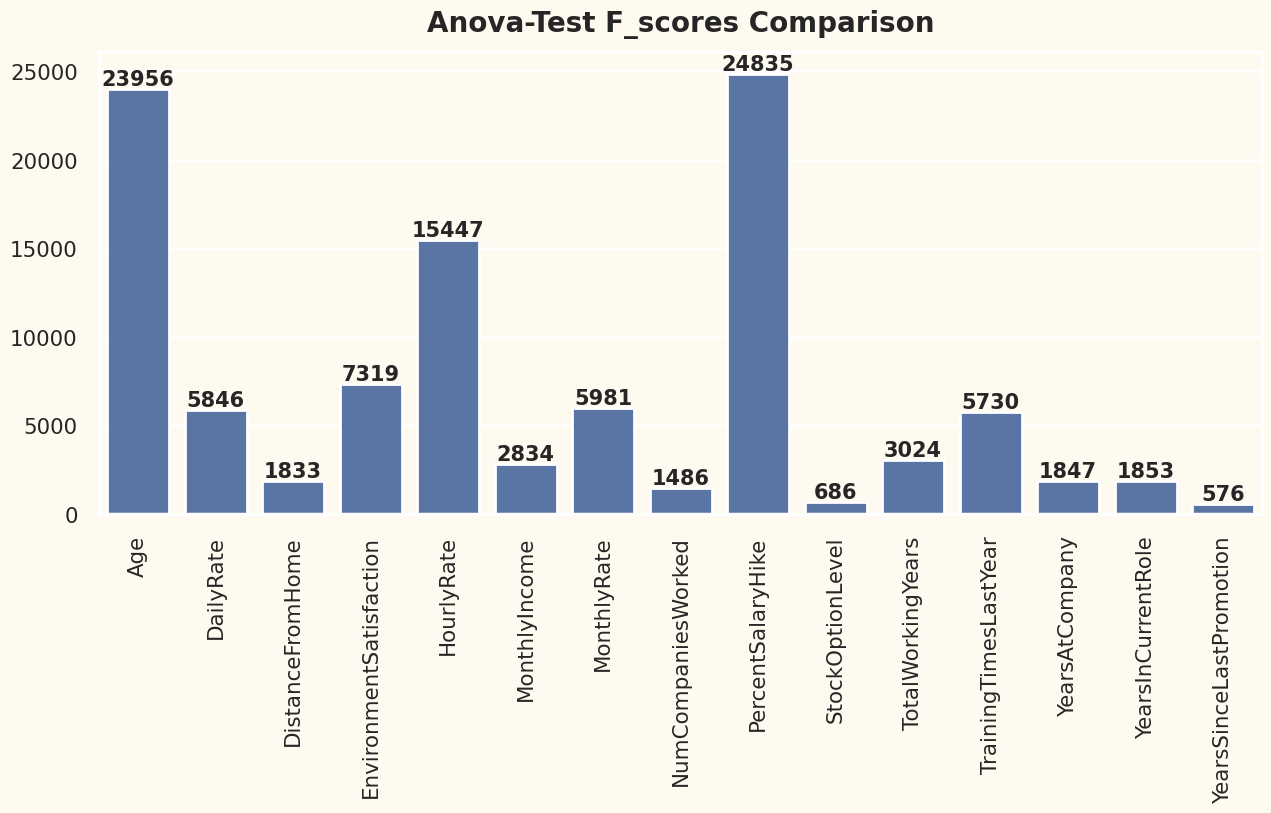

In [ ]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

# Filter out NaN values and their corresponding keys
cleaned_keys = []
cleaned_values = []
for k, v in zip(keys, values):
    if not pd.isna(v): # Check for NaN using pandas isna
        cleaned_keys.append(k)
        cleaned_values.append(v)

sns.barplot(x=cleaned_keys, y=cleaned_values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(cleaned_values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

**3] COMPARING F_SCORE AND P_VALUE OF ANOVA TEST.**

In [ ]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]

test_df

,Features,F_Score,P_value
0,Age,23956.777309,0.00000000000000000000
1,DailyRate,5846.354224,0.00000000000000000000
2,DistanceFromHome,1833.457264,0.00000000000000000000
3,EnvironmentSatisfaction,7319.526848,0.00000000000000000000
4,HourlyRate,15447.009867,0.00000000000000000000
5,MonthlyIncome,2834.581343,0.00000000000000000000
6,MonthlyRate,5981.912982,0.00000000000000000000
7,NumCompaniesWorked,1486.260500,0.00000000000000000000
8,PercentSalaryHike,24835.530388,0.00000000000000000000
9,StockOptionLevel,686.630558,0.00000000000000000000


**Inference:**

**The following features shows a strong association with attrition, as indicated by their high F-scores and very low p-values.**

Age

DailyRate

HourlyRate

MonthlyIncome

MonthlyRate

NumCompaniesWorked

PercentSalaryHike

TotalWorkingYears

TrainingTimesLastYear

YearsAtCompany

YearsWithCurrManager

**The following features doen't shows significant relationship with attrition because of their moderate F-scores and extremely high p-values.**

DistanceFromHome

StockOptionLevel

YearsInCurrentRole

YearsSinceLastPromotion

**It is important for the organization to pay attention to the identified significant features and consider them when implementing strategies to reduce attrition rates.**

**4] PERFORM CHI-SQUARE TEST**

ANALYZE THE CATEGORICAL FEATURES IMPORTANCE IN EMPLOYEE ATTRITION

In [ ]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

**5] VISUALIZE THE CHI-SQUARE STATISTICS VALUES**

OF CATEGORICAL FEATURES

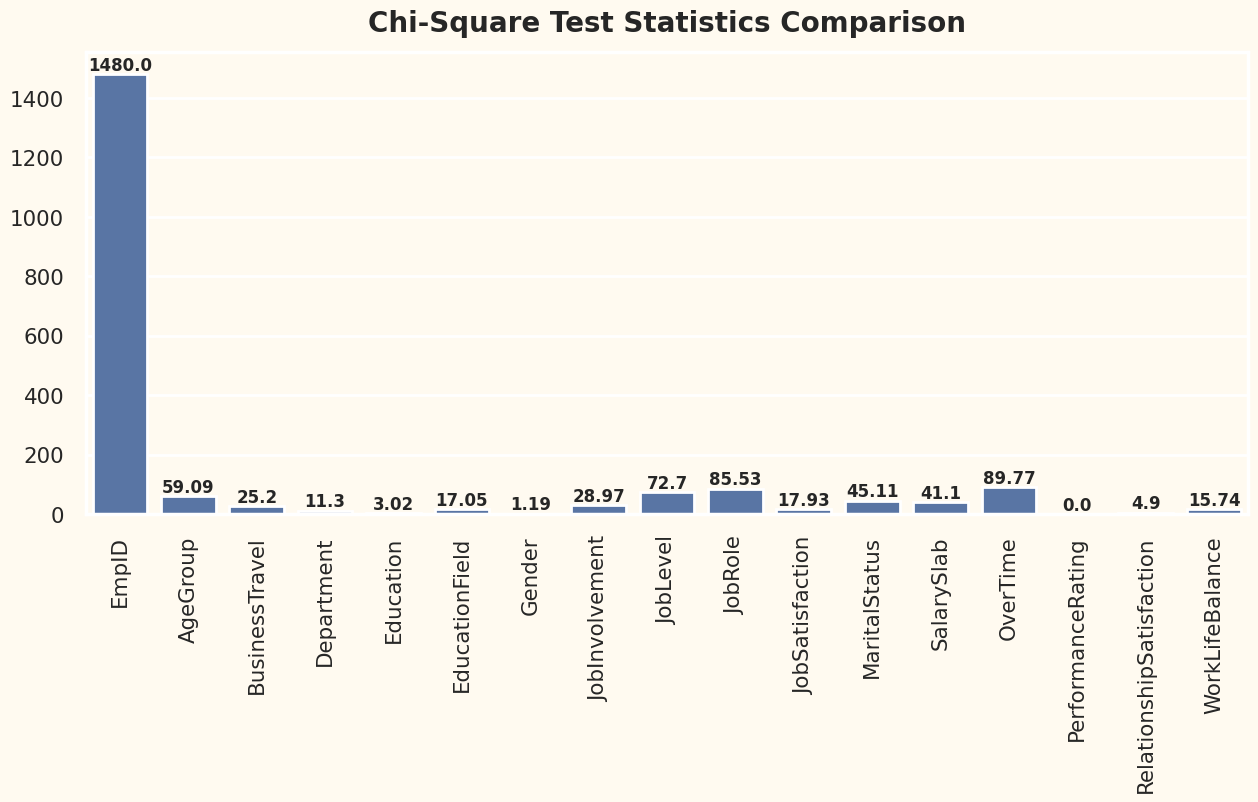

In [ ]:
plt.figure(figsize=(15,6))
keys = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

sns.barplot(x=keys, y=values)
plt.title("Chi-Square Test Statistics Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,round(value, 2), ha="center", va="bottom",fontweight="black",size=12)
plt.show()

**6] COMPARING CHI^2_STATISTICS AND P_VALUE OF CHI^2 TEST.**

In [ ]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

test_df

,Features,Chi_2 Statistic,P_value
0,EmpID,1480.000000,0.41498994128648819535
1,AgeGroup,59.092236,0.00000000000450028501
2,BusinessTravel,25.199246,0.00001402800878550044
3,Department,11.303380,0.00351157664358481714
4,Education,3.024622,0.55371347991920438769
5,EducationField,17.050988,0.00440410582471008772
6,Gender,1.186442,0.27604835591828547070
7,JobInvolvement,28.967665,0.00000227473945469118
8,JobLevel,72.699065,0.00000000000000610779
9,JobRole,85.525255,0.00000000000000375211


**7] DESCRIPTIVE ANALYSIS ON CATEGORICAL ATTRIBUTES**

**Inference:**

**The following features showed statistically significant associations with employee attrition:**


Department

EducationField

EnvironmentSatisfaction

JobInvolvement

JobLevel

JobRole

JobSatisfaction

MaritalStatus

OverTime

WorkLifeBalance

**The following features did not show statistically significant associations with attrition.**

Gender

Education

PerformanceRating

RelationshipSatisfaction

**It is important for the organization to pay attention to the identified significant features and consider them when implementing strategies to reduce attrition rates.**

**Second Part Start Modeling: **

Importing Various Modules

Loading Dataset

Label Encoding

Data Processing

Train and Test Dataset

Data Modeling

1] Logistic Regression

2] Random Forest

3] Support Vector Machine

4] XGBOOST

5] LIGHTGBM

6] CATBOOST

7] ADABOOST

Comparing Model Performance

In [ ]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

# Library for Data Manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
!pip install hvplot
!pip install catboost
import hvplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

print("==================== Packages Loaded ======================")

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

==================== BLOCK 1 Started! ======================
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 8.5 MB/s eta 0:00:00
==================== Packages Loaded ======================


In [ ]:
# Print the shape of the DataFrame
print("The shape of data frame:", df.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(df))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(df.columns))

The shape of data frame: (1480, 34)
Number of Rows in the dataframe: 1480
Number of Columns in the dataframe: 34


**LABEL ENCODING**

In [ ]:
# Convert categorical variables into numerical form.
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   int64  
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   object 
 9   EducationField            1480 non-null   object 
 10  EnvironmentSatisfaction   1480 non-null   int64  
 11  Gender                    1480 non-null   object 
 12  HourlyRate                1480 non-null   int64  
 13  JobInvolvement            1480 non-null   object 
 14  JobLevel

**DATA PROCESSING**

In [ ]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Columns: 145 entries, EmpID to YearsWithCurrManager_17.0
dtypes: int64(9), object(1), uint8(135)
memory usage: 310.9+ KB


In [ ]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1480, 145)
(1473, 145)


<Axes: >

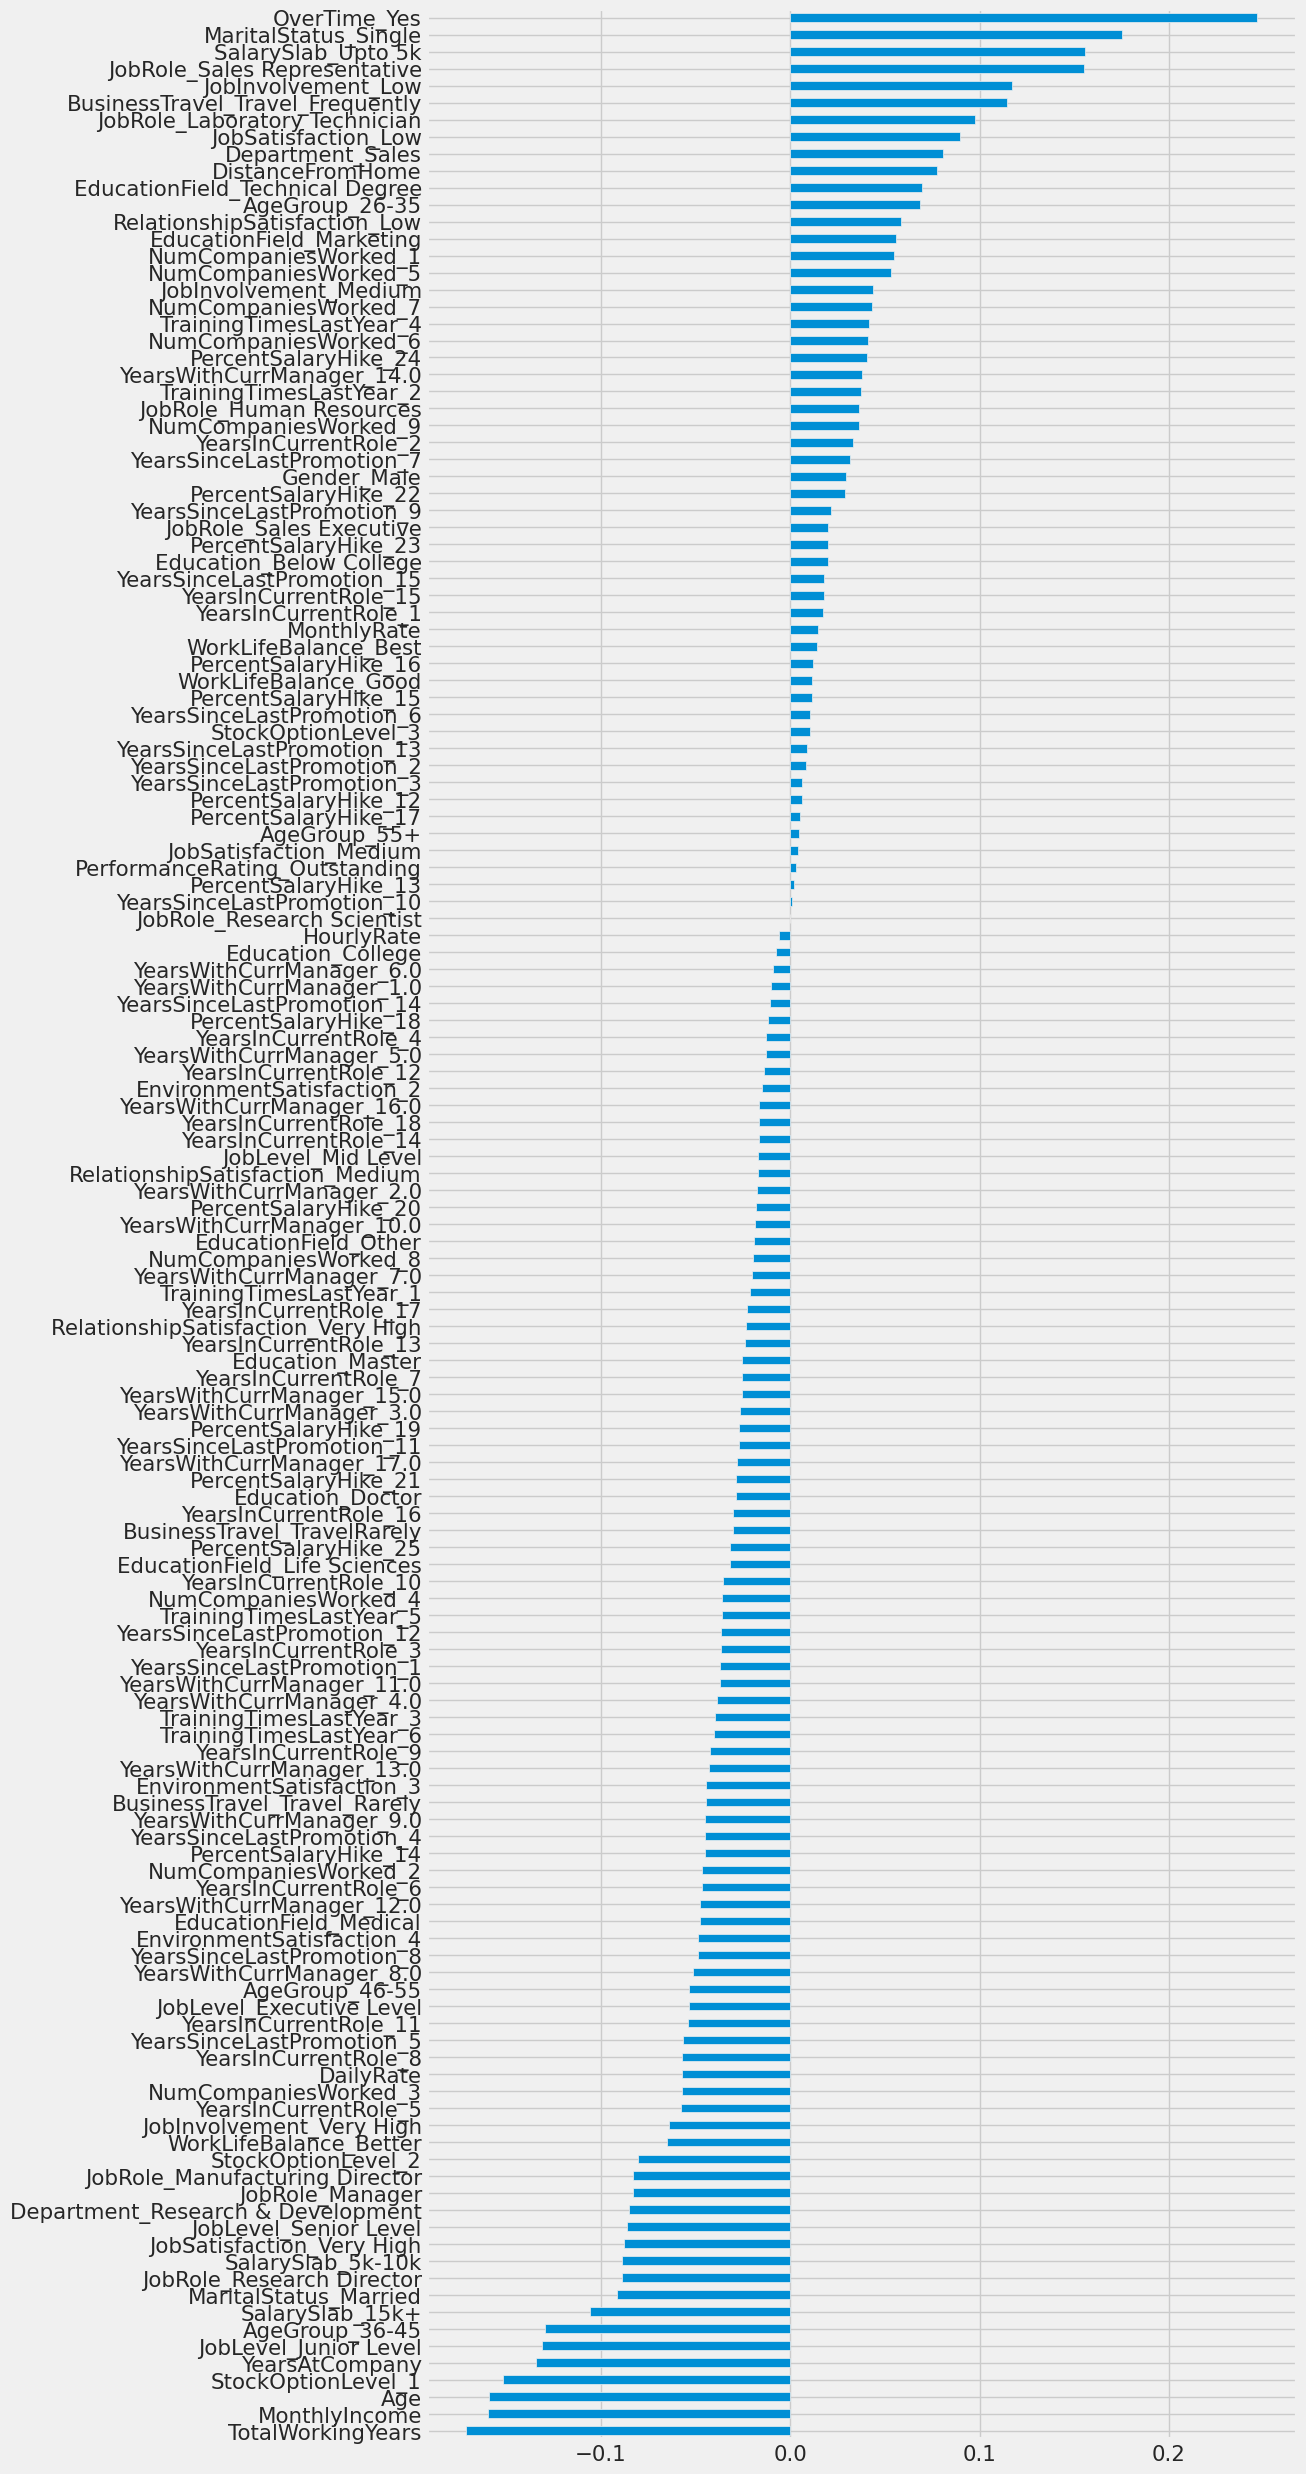

In [ ]:
data.drop(['Attrition', 'EmpID'], axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [ ]:
feature_correlation = data.drop(['Attrition', 'EmpID'], axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

102

**TRAIN AND TEST DATASET**

In [ ]:
X = data.drop(['Attrition', 'EmpID'], axis=1)
y = data.Attrition.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)


def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)


y_test.value_counts()[0] / y_test.shape[0]

np.float64(0.8393665158371041)

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.90%
Leaving Rate: 16.10%
===============TEST=================
Staying Rate: 83.94%
Leaving Rate: 16.06%


In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

**LOGISTIC REGRESSION**

In [ ]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[846  19]
 [ 64 102]]
ACCURACY SCORE:
0.9195
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.929670    0.842975  0.919496     0.886323      0.915712
recall       0.978035    0.614458  0.919496     0.796246      0.919496
f1-score     0.953239    0.710801  0.919496     0.832020      0.914205
support    865.000000  166.000000  0.919496  1031.000000   1031.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[347  24]
 [ 37  34]]
ACCURACY SCORE:
0.8620
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.903646   0.586207  0.861991    0.744926      0.852655
recall       0.935310   0.478873  0.861991    0.707092      0.861991
f1-score     0.919205   0.527132  0.861991    0.723169      0.856225
support    371.000000  71.000000  0.861991  442.000000    442.000000


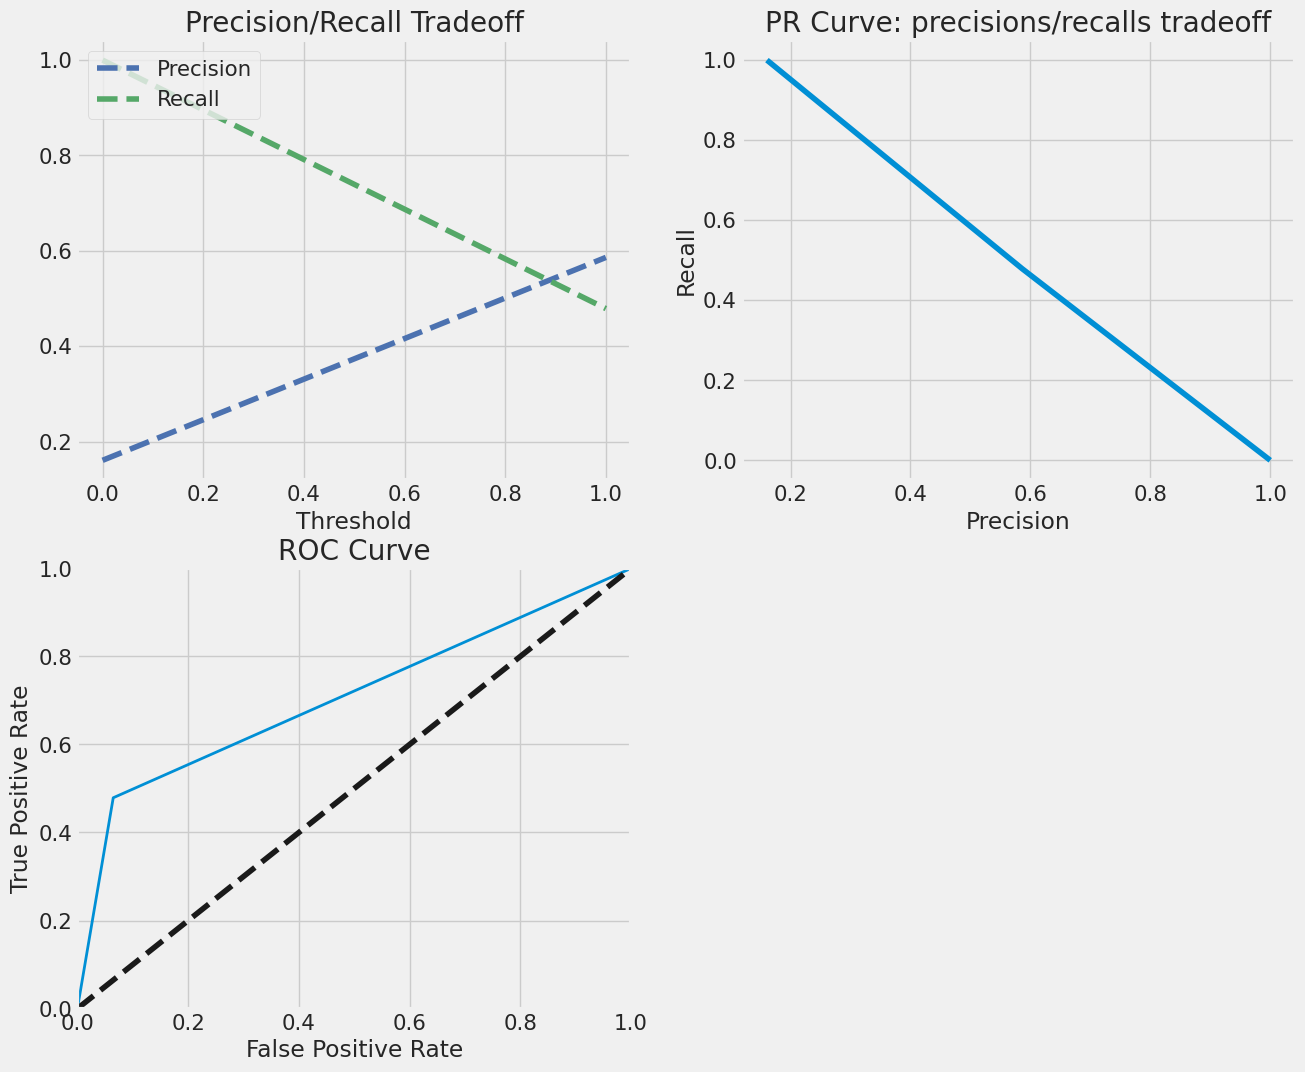

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

**RANDOM FOREST CLASSIFIER**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[865   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    865.0  166.0       1.0     1031.0        1031.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[371   0]
 [ 61  10]]
ACCURACY SCORE:
0.8620
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.858796   1.000000  0.861991    0.929398      0.881478
recall       1.000000   0.140845  0.861991    0.570423      0.861991
f1-score     0.924035   0.246914  0.861991    0.585474      0.815267
support    371.000000  71.000000  0.861991  442.000000    442.000000


In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Change 'search' to this:
search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_grid,
    n_iter=50,      # Only tries 50 random combinations instead of 648
    scoring='roc_auc',
    cv=3,           # Reduced folds from 5 to 3 for speed
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [61]:
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

search = HalvingGridSearchCV(
    rf_clf,
    param_grid,
    resource='n_samples',
    max_resources='auto',
    random_state=42,
    n_jobs=-1
)

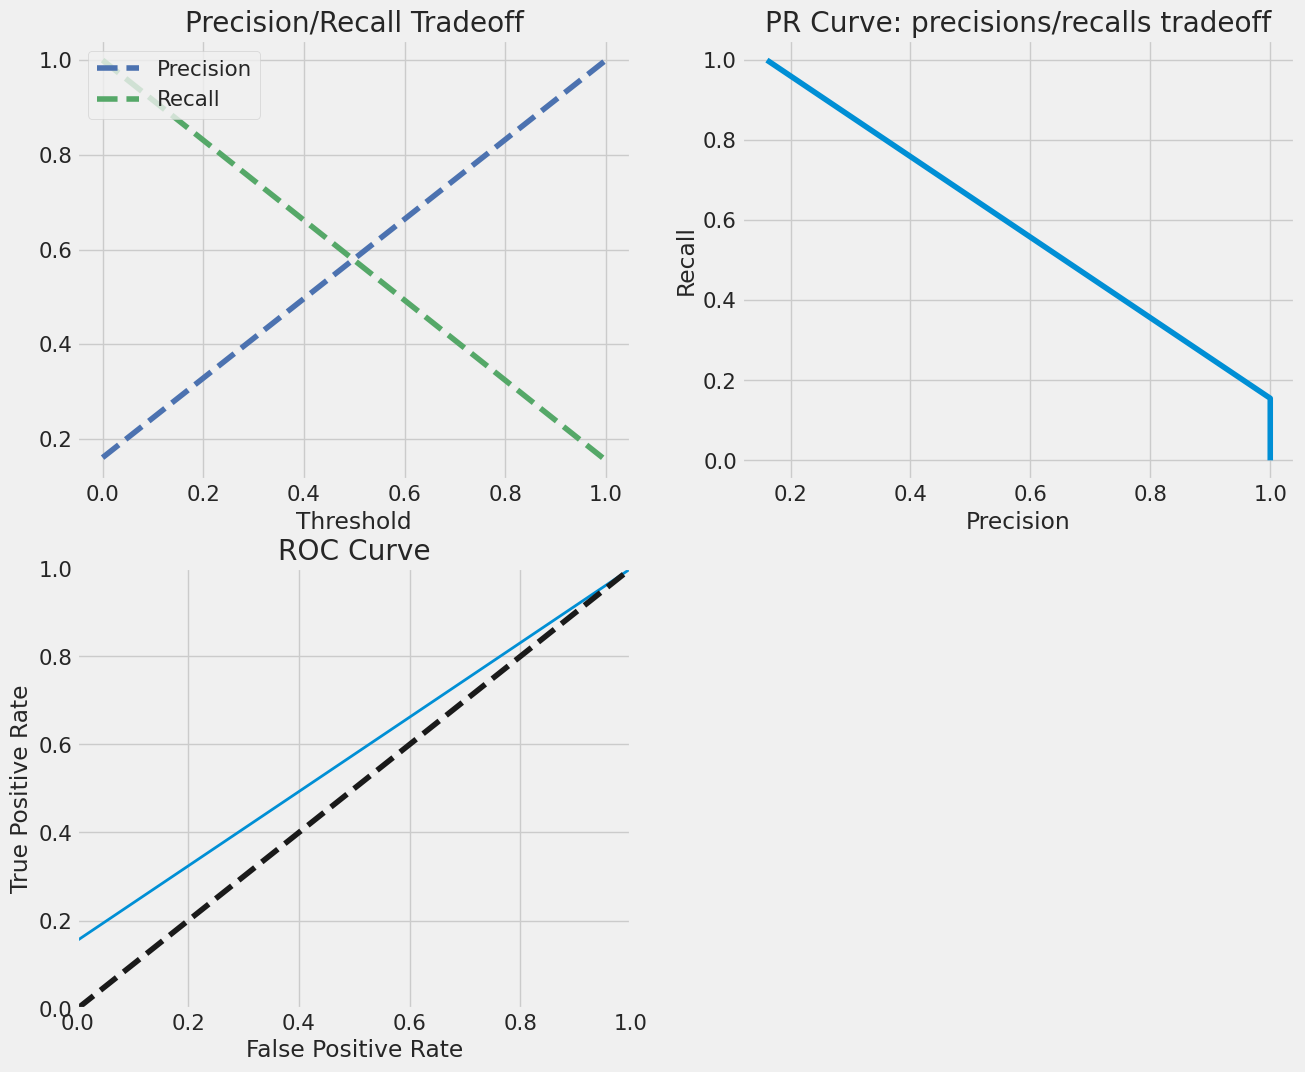

In [64]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf_clf.fit(X_train, y_train)

precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

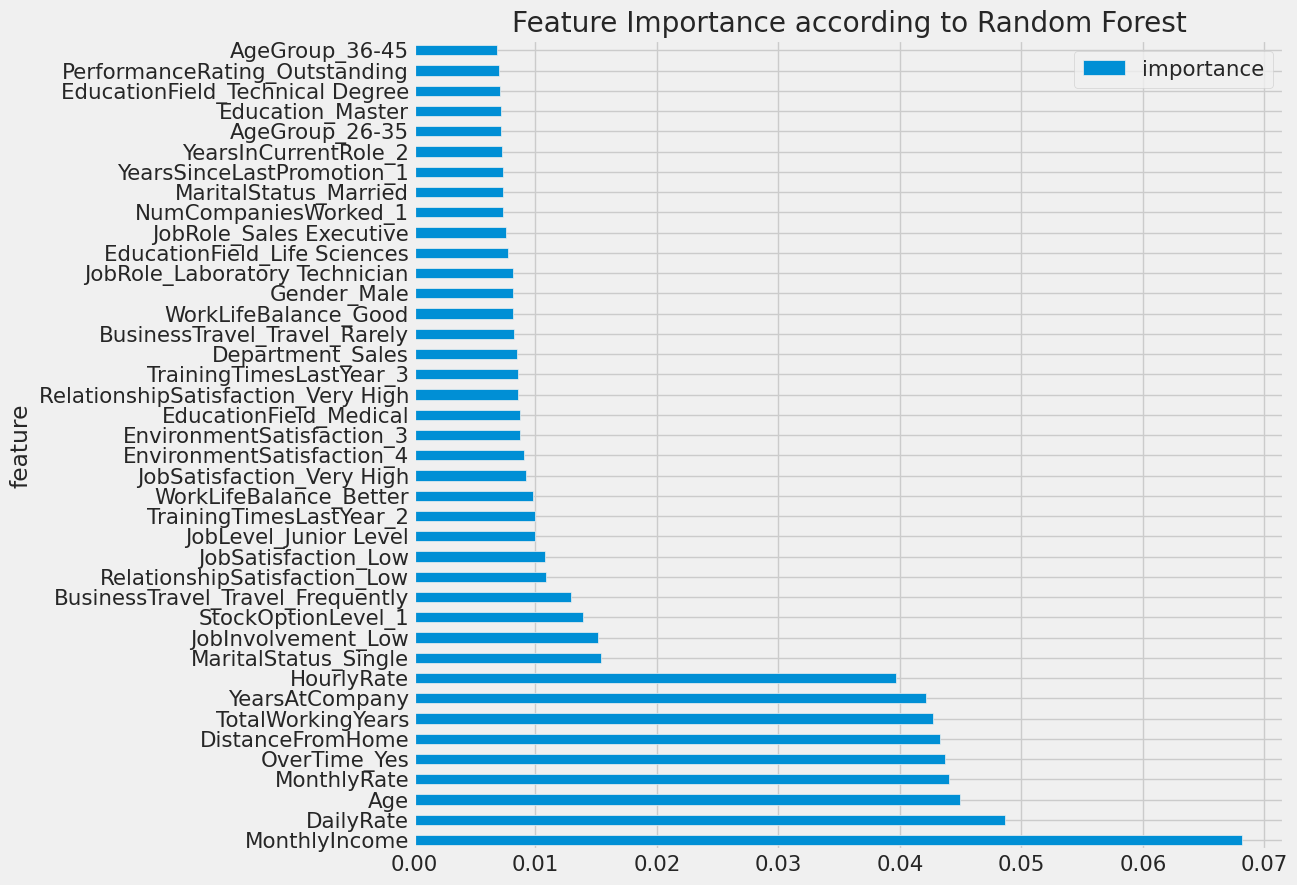

In [65]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }


df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

**SUPPORT VECTOR MACHINE**

In [66]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[841  24]
 [ 46 120]]
ACCURACY SCORE:
0.9321
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.948140    0.833333  0.932105     0.890737      0.929655
recall       0.972254    0.722892  0.932105     0.847573      0.932105
f1-score     0.960046    0.774194  0.932105     0.867120      0.930122
support    865.000000  166.000000  0.932105  1031.000000   1031.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  25]
 [ 31  40]]
ACCURACY SCORE:
0.8733
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.917772   0.615385  0.873303    0.766578      0.869198
recall       0.932615   0.563380  0.873303    0.747997      0.873303
f1-score     0.925134   0.588235  0.873303    0.756684      0.871017
support    371.000000  71.000000  0.873303  442.000000    442.000000


In [68]:
search = GridSearchCV(svm_clf, param_grid=param_grid, n_jobs=-1, scoring='roc_auc', cv=3, verbose=1)

from sklearn.model_selection import RandomizedSearchCV

# Use a distribution or a list
search = RandomizedSearchCV(svm_clf, param_distributions=param_grid, n_iter=10, n_jobs=-1, cv=3, scoring='roc_auc', verbose=1)

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

search = HalvingGridSearchCV(svm_clf, param_grid, resource='n_samples', factor=3, cv=3)

In [70]:
svm_clf = SVC(kernel='linear', C=1, random_state=42) # Fallback to a default configuration as search.best_params_ is unavailable
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[841  24]
 [ 46 120]]
ACCURACY SCORE:
0.9321
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.948140    0.833333  0.932105     0.890737      0.929655
recall       0.972254    0.722892  0.932105     0.847573      0.932105
f1-score     0.960046    0.774194  0.932105     0.867120      0.930122
support    865.000000  166.000000  0.932105  1031.000000   1031.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  25]
 [ 31  40]]
ACCURACY SCORE:
0.8733
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.917772   0.615385  0.873303    0.766578      0.869198
recall       0.932615   0.563380  0.873303    0.747997      0.873303
f1-score     0.925134   0.588235  0.873303    0.756684      0.871017
support    371.000000  71.000000  0.873303  442.000000    442.000000


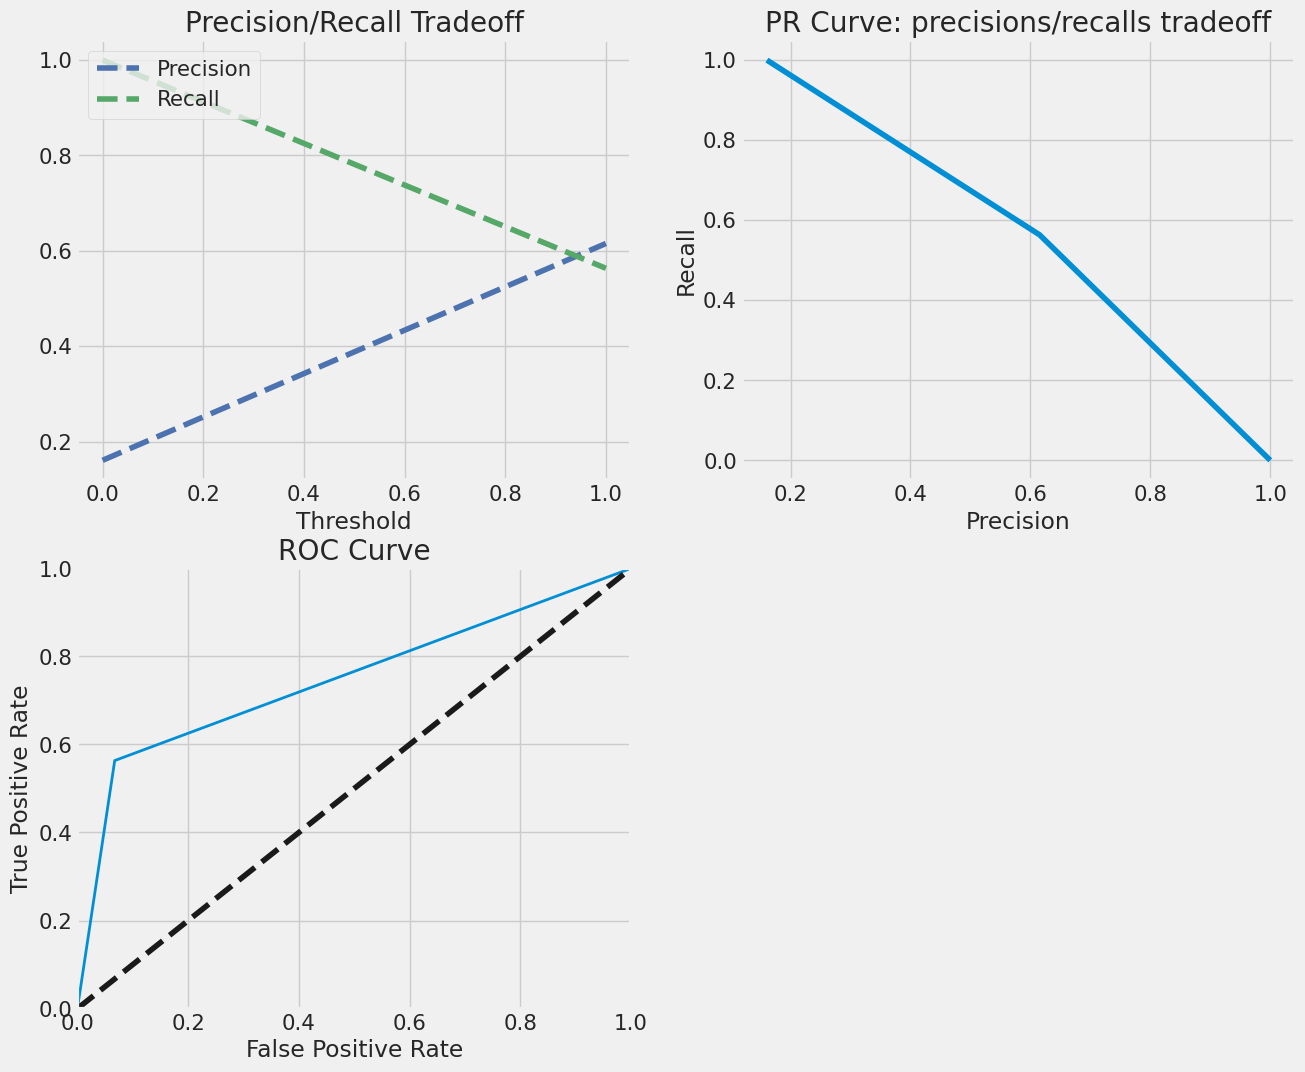

In [71]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [72]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

**XGBOOST CLASSIFIER**

In [74]:
# Ensure all columns are numeric where possible, and explicitly convert remaining object columns to 'category' dtype.
# This addresses cases where numeric columns might be inadvertently interpreted as 'object'
# and handles genuine string categorical columns for XGBoost.

for col in X_train.columns:
    # Attempt to convert to numeric. `errors='ignore'` will leave non-numeric object columns as object.
    X_train[col] = pd.to_numeric(X_train[col], errors='ignore')
    X_test[col] = pd.to_numeric(X_test[col], errors='ignore')

# Now, iterate again to explicitly convert any remaining 'object' columns to 'category' dtype.
# These would be actual string categorical columns that were not one-hot encoded or numeric.
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Initialize XGBClassifier with enable_categorical=True to properly handle category dtypes
xgb_clf = XGBClassifier(enable_categorical=True)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Evaluate the model
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[865   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    865.0  166.0       1.0     1031.0        1031.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   8]
 [ 47  24]]
ACCURACY SCORE:
0.8756
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.885366   0.750000  0.875566    0.817683      0.863622
recall       0.978437   0.338028  0.875566    0.658232      0.875566
f1-score     0.929577   0.466019  0.875566    0.697798      0.855115
support    371.000000  71.000000  0.875566  442.000000    442.000000


In [75]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

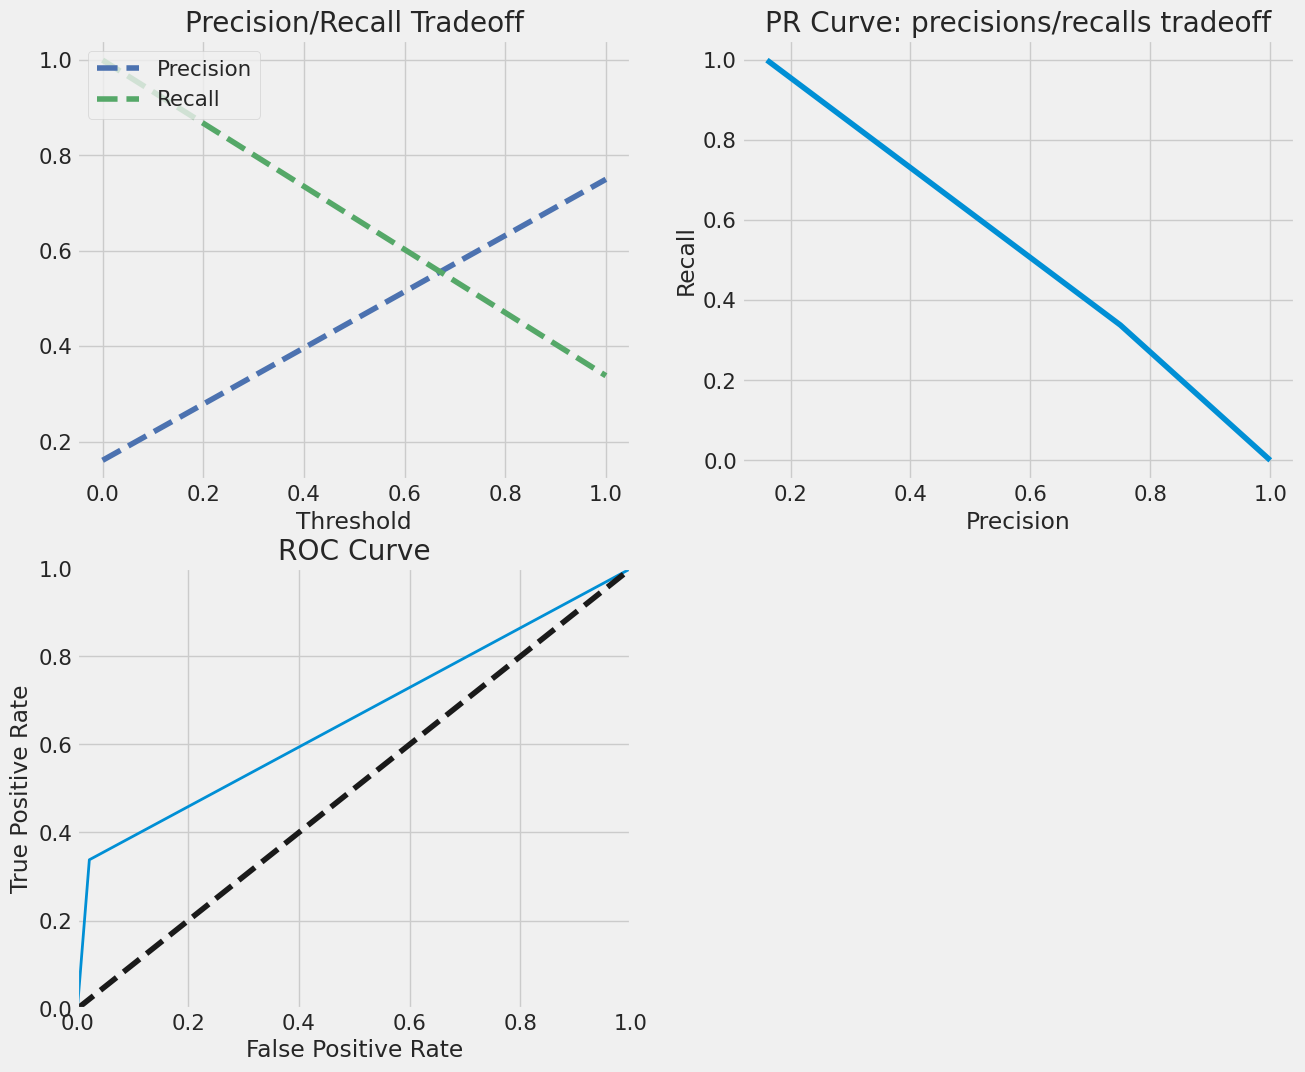

In [76]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

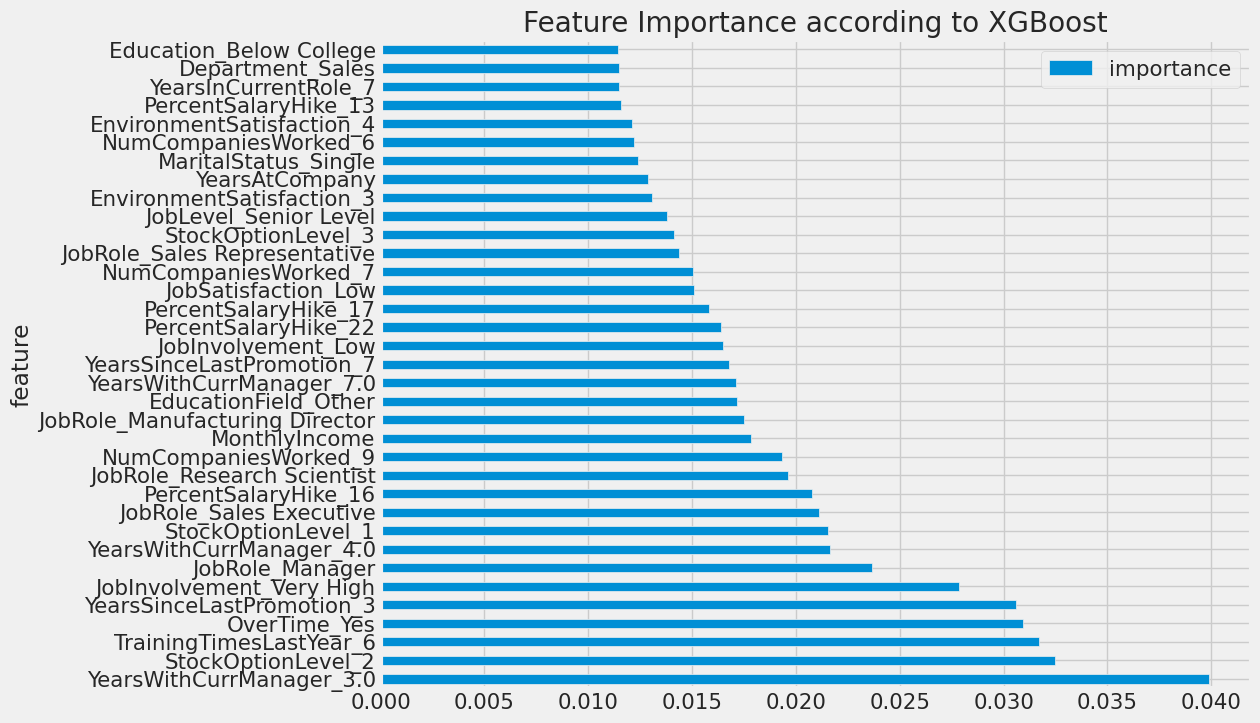

In [77]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

**LIGHTGBM CLASSIFIER**

In [78]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 166, number of negative: 865
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 1031, number of used features: 119
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161009 -> initscore=-1.650742
[LightGBM] [Info] Start training from score -1.650742
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[865   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    865.0  166.0  

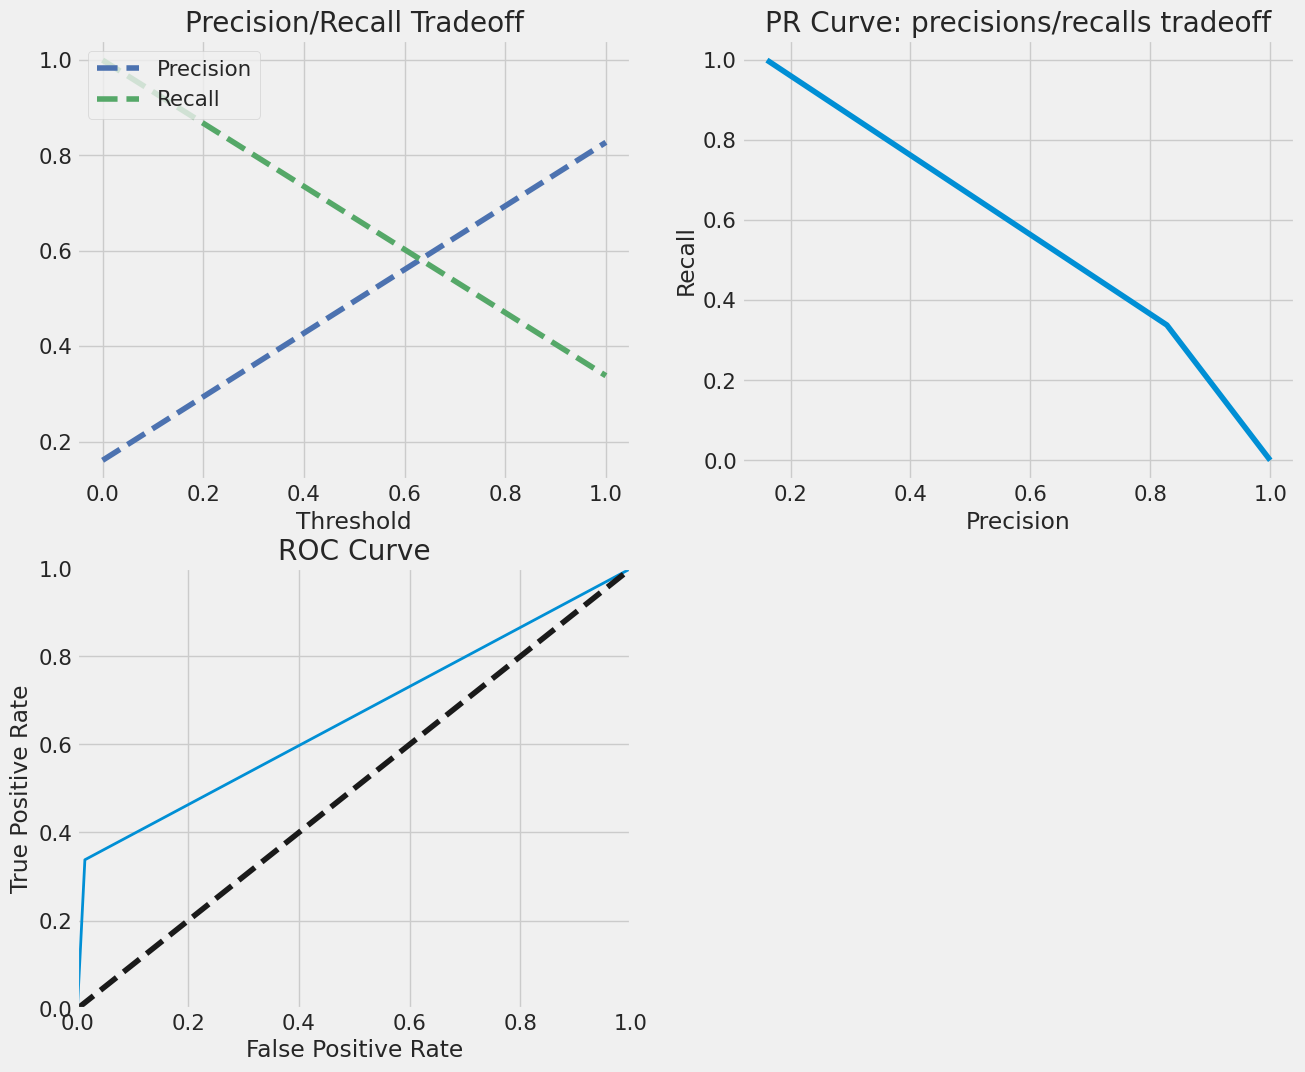

In [79]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [80]:
scores_dict['LightGBM'] = {
        'Train': roc_auc_score(y_train, lgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lgb_clf.predict(X_test)),
    }

**CATBOOST CLASSIFIER**

In [81]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[865   0]
 [ 20 146]]
ACCURACY SCORE:
0.9806
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.977401    1.000000  0.980601     0.988701      0.981040
recall       1.000000    0.879518  0.980601     0.939759      0.980601
f1-score     0.988571    0.935897  0.980601     0.962234      0.980090
support    865.000000  166.000000  0.980601  1031.000000   1031.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[369   2]
 [ 54  17]]
ACCURACY SCORE:
0.8733
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.872340   0.894737  0.873303    0.883539      0.875938
recall       0.994609   0.239437  0.873303    0.617023      0.873303
f1-score     0.929471   0.377778  0.873303    0.653624      0.840851
support    371.000000  71.000000  0.873303  442.000000    442.000000


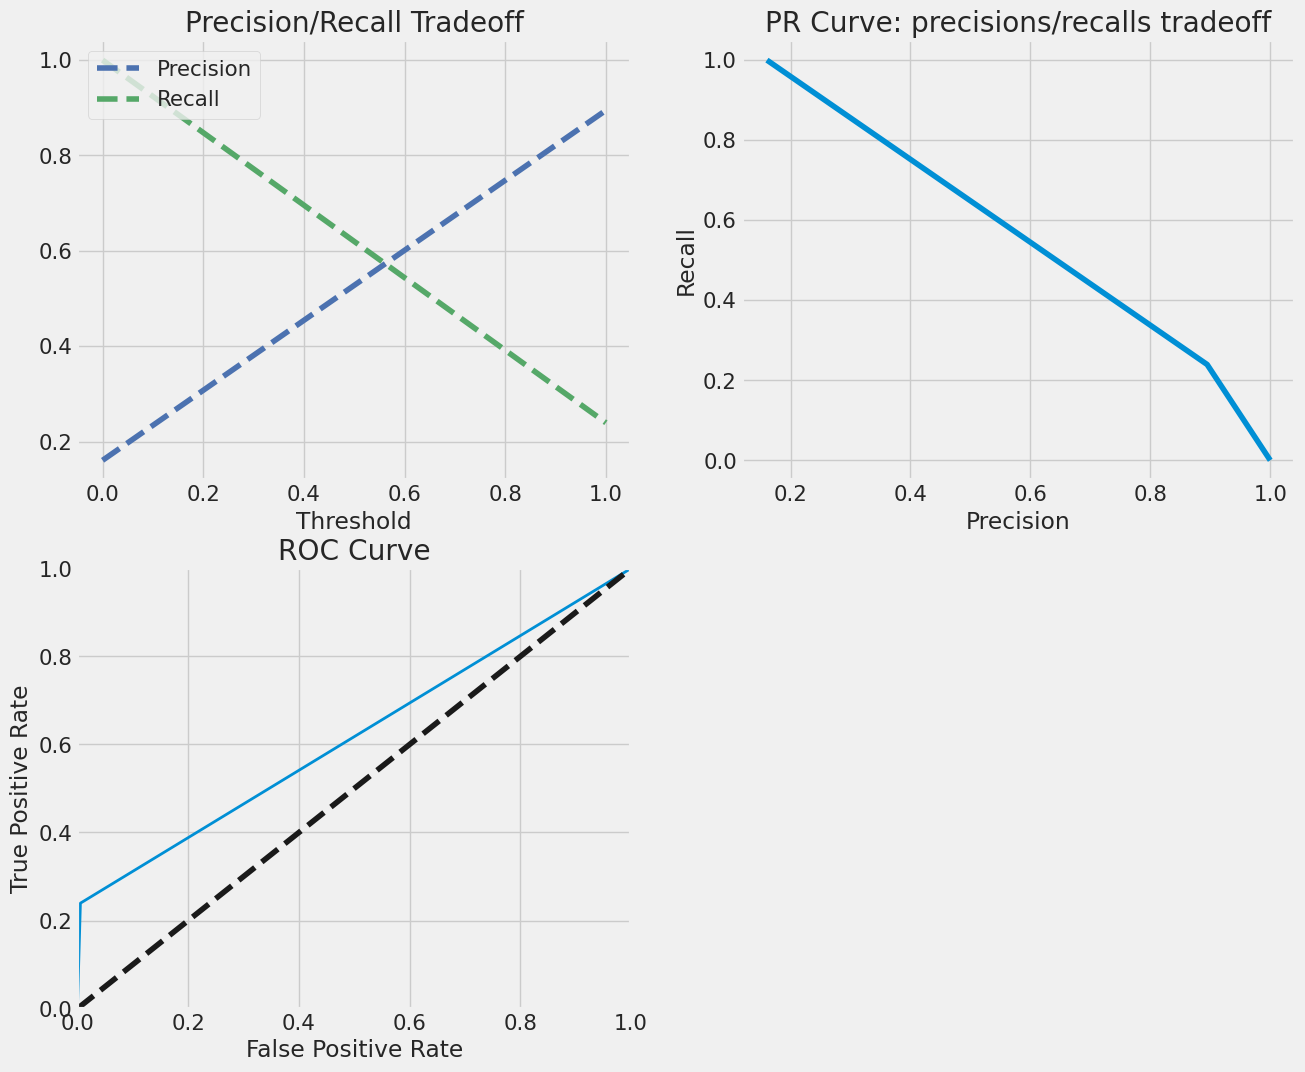

In [82]:
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [83]:
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, cb_clf.predict(X_test)),
    }

**ADABOOST CLASSIFIER**

In [84]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[853  12]
 [114  52]]
ACCURACY SCORE:
0.8778
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.882110    0.812500  0.877789     0.847305      0.870902
recall       0.986127    0.313253  0.877789     0.649690      0.877789
f1-score     0.931223    0.452174  0.877789     0.691698      0.854092
support    865.000000  166.000000  0.877789  1031.000000   1031.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[362   9]
 [ 48  23]]
ACCURACY SCORE:
0.8710
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.882927   0.718750  0.871041    0.800838      0.856555
recall       0.975741   0.323944  0.871041    0.649842      0.871041
f1-score     0.927017   0.446602  0.871041    0.686809      0.849846
support    371.000000  71.000000  0.871041  442.000000    442.000000


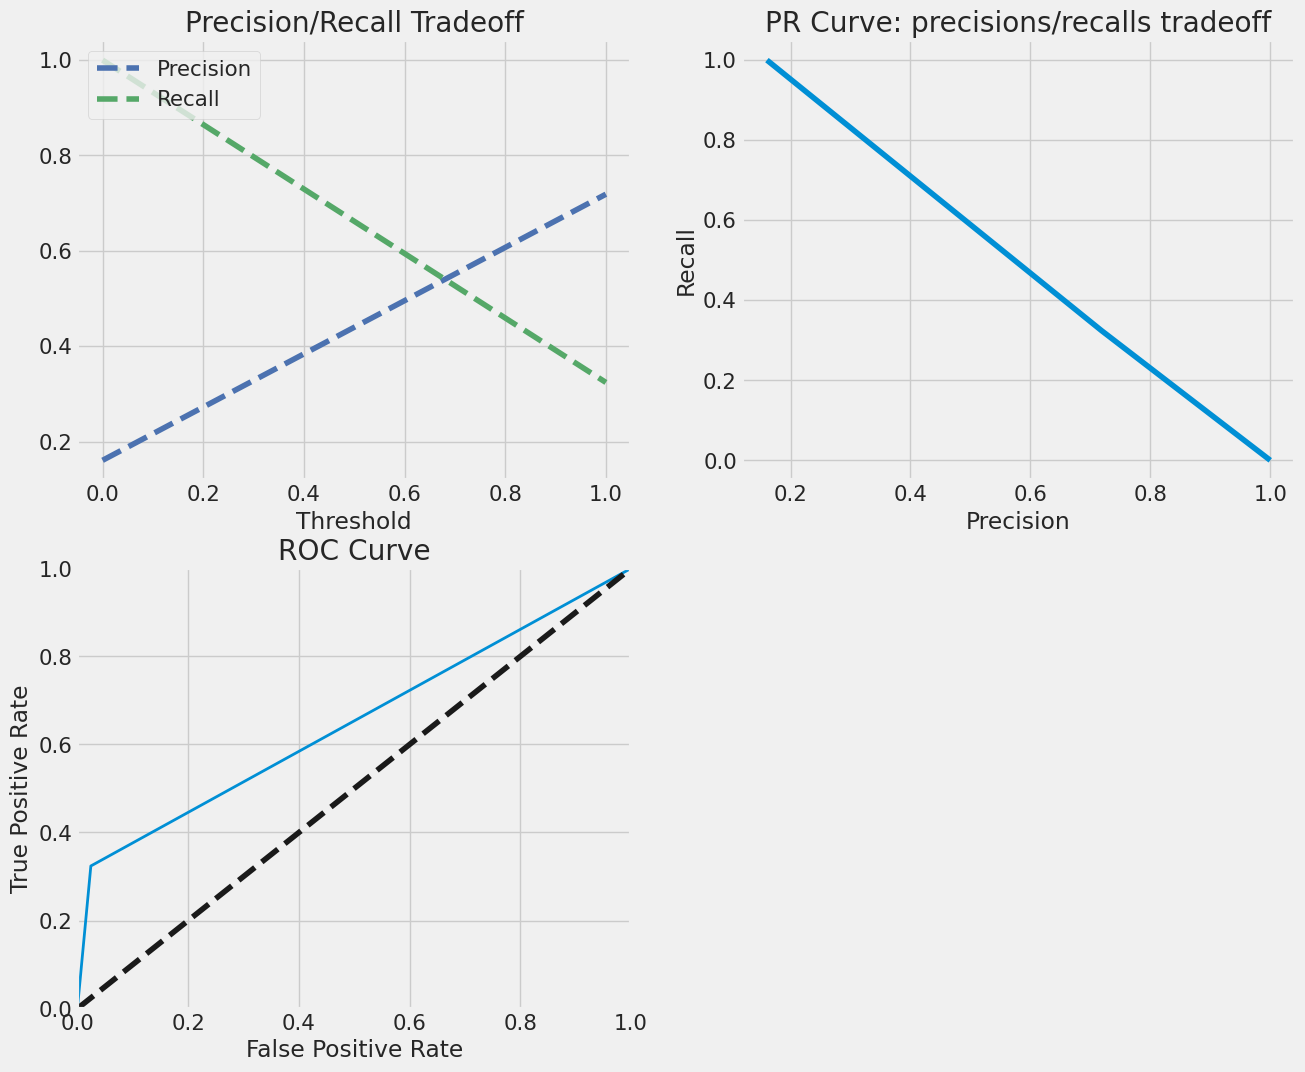

In [85]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [86]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),
    }

**COMPARING MODEL PERFORMANCE**

In [87]:
ml_models = {
    'Random Forest': rf_clf,
    'XGBoost': xgb_clf,
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.577
XGBOOST                        roc_auc_score: 0.658
LOGISTIC REGRESSION            roc_auc_score: 0.590
SUPPORT VECTOR MACHINE         roc_auc_score: 0.590
LIGHTGBM                       roc_auc_score: 0.662
CATBOOST                       roc_auc_score: 0.617
ADABOOST                       roc_auc_score: 0.650


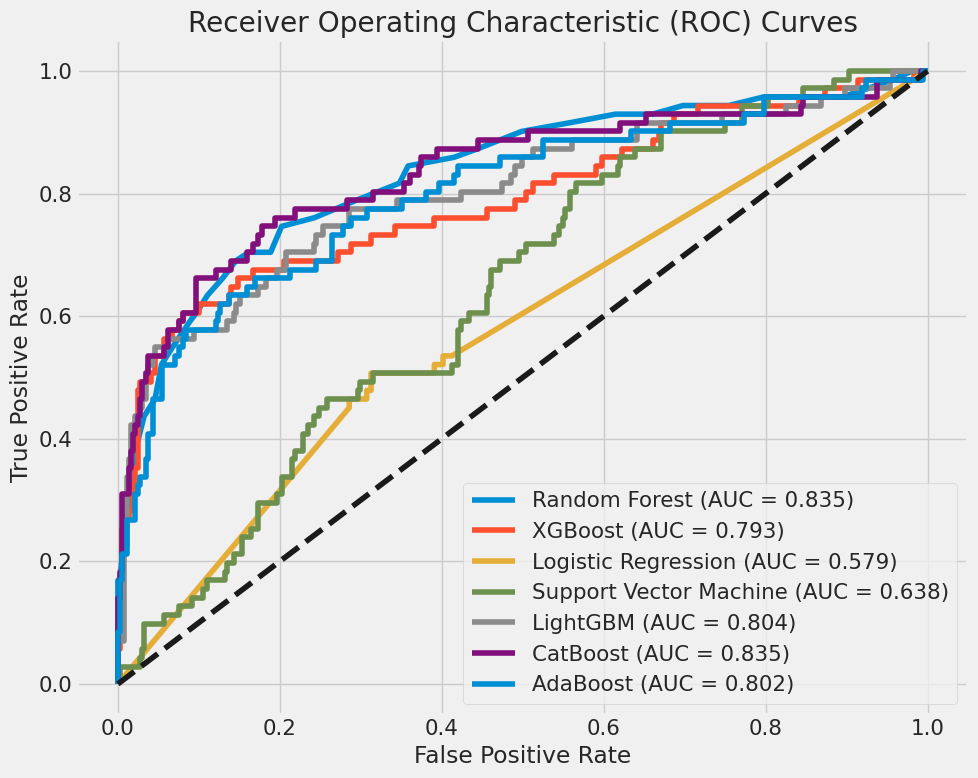

In [88]:
plt.figure(figsize=(10, 8))

# Iterate through each model
for model_name, model in ml_models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        # Predict probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict(X_test)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

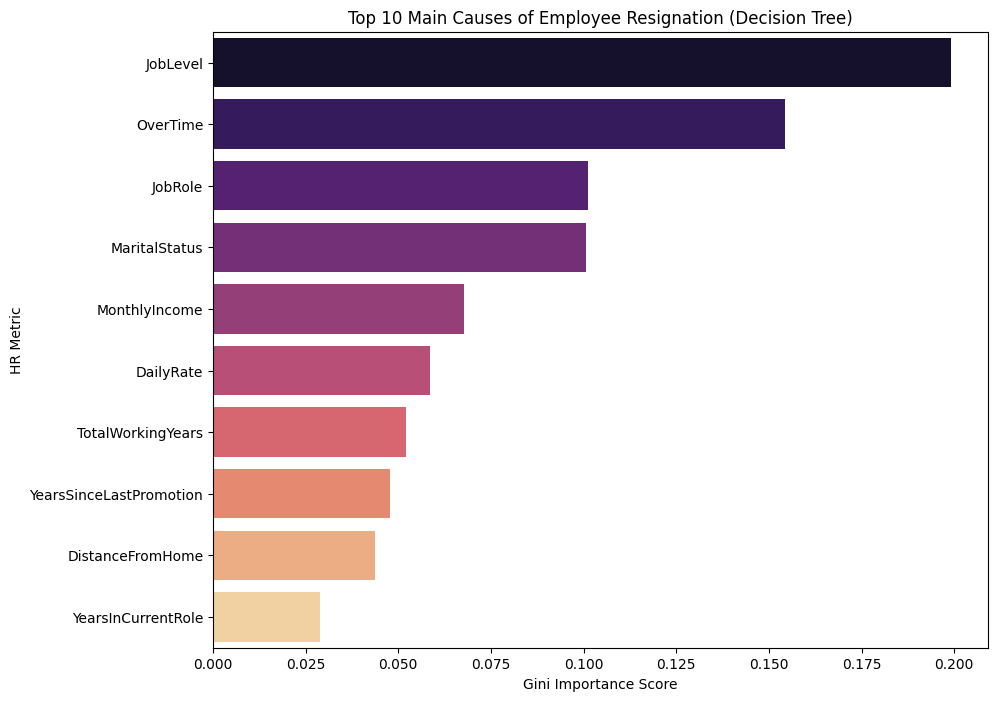

                    Feature  Importance
13                 JobLevel    0.199181
21                 OverTime    0.154318
14                  JobRole    0.101082
16            MaritalStatus    0.100736
17            MonthlyIncome    0.067615
4                 DailyRate    0.058550
26        TotalWorkingYears    0.052052
31  YearsSinceLastPromotion    0.047829
6          DistanceFromHome    0.043576
30       YearsInCurrentRole    0.028849


In [ ]:
# Load and Preprocess Data

df = pd.read_csv('/content/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

# Encode categorical variables (e.g., 'Yes'/'No' to 1/0)
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Split Data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
# We limit max_depth to avoid overfitting and keep the logic clear
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Extract Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize the Top Drivers
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='magma')
plt.title('Top 10 Main Causes of Employee Resignation (Decision Tree)')
plt.xlabel('Gini Importance Score')
plt.ylabel('HR Metric')
plt.show()

# Display numerical values
print(feature_importances.head(10))

**Reason for the attrition**

Feature Importance Interpretation

JobLevel 0.199 Primary Predictor. Attrition is tied to the employee's rank/seniority.

OverTime 0.154 Work-Life Balance. Burnout is a major cause of resignation.

MonthlyIncome 0.067 Financial. While important, it is actually less influential than JobLevel and OverTime in this specific model.

Promotion Gap 0.047 Growth. Stagnation contributes but is a secondary factor compared to the daily grind (Overtime).

Generating SHAP Summary Plot...


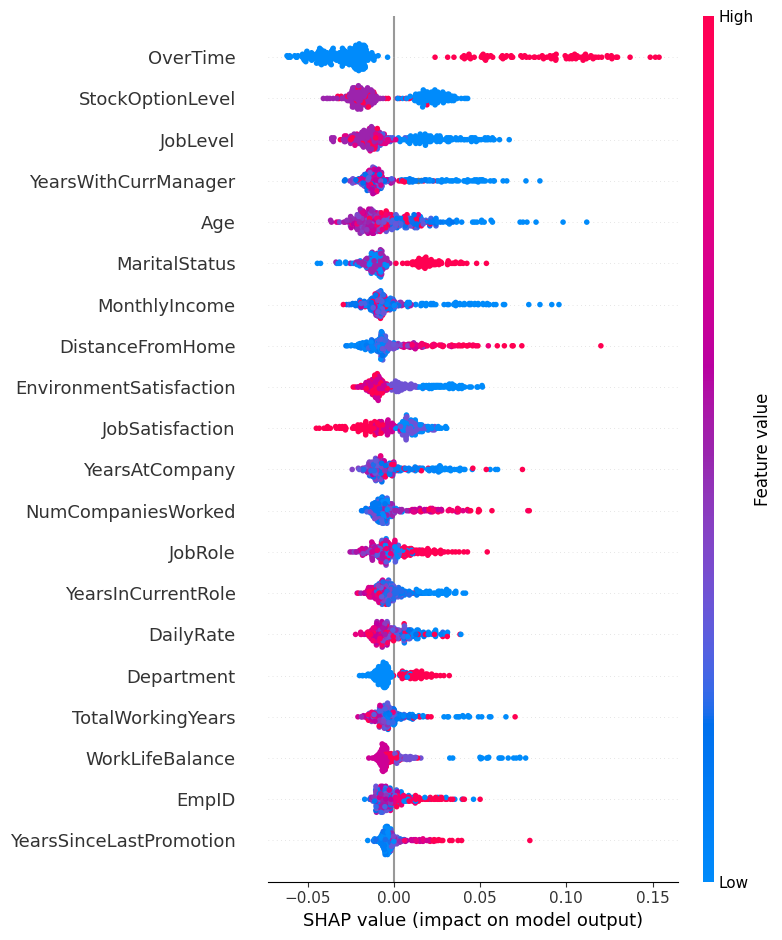

In [ ]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load and Preprocess
df = pd.read_csv('/content/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

# Label Encoding for categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP Analysis
# Create an explainer and calculate shap values for the test set
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualization 1: Summary Plot
# This shows the magnitude and direction of features
print('Generating SHAP Summary Plot...')
shap.summary_plot(shap_values[:, :, 1], X_test.values, feature_names=X_test.columns) # index [1] represents the 'Attrition: Yes' class

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# 2. Preprocessing
# Load fresh data to avoid variable contamination
raw_df = pd.read_csv('/content/IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

# Encode categorical variables (e.g., 'Yes'/'No' to 1/0)
le = LabelEncoder()
for col in raw_df.select_dtypes(include=['object']).columns:
    raw_df[col] = le.fit_transform(raw_df[col])

# Fill missing values in YearsWithCurrManager
raw_df['YearsWithCurrManager'] = raw_df['YearsWithCurrManager'].fillna(raw_df['YearsWithCurrManager'].median())

# Separate features (X) and target (y)
# Drop EmpID as it's an identifier, and Attrition as it's the target
X = raw_df.drop(['EmpID', 'Attrition'], axis=1)
y = raw_df['Attrition'] # Corrected: 'Attrition' is already numerical after LabelEncoder

# Convert categorical variables into dummy/indicator variables
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Split data into Training and Testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scaling (Required for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- MODEL 1: Logistic Regression ---
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]


# 5. Output Results
print("--- Logistic Regression Performance ---")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, lr_probs):.4f}")
print(classification_report(y_test, lr_pred))

--- Logistic Regression Performance ---
Accuracy: 0.8784
ROC AUC: 0.8195
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       248
           1       0.75      0.38      0.50        48

    accuracy                           0.88       296
   macro avg       0.82      0.68      0.72       296
weighted avg       0.87      0.88      0.86       296



In [92]:
# --- MODEL 2: Decision Tree ---
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_probs = dt_model.predict_proba(X_test)[:, 1]

print("\n--- Decision Tree Performance ---")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, dt_probs):.4f}")
print(classification_report(y_test, dt_pred))


--- Decision Tree Performance ---
Accuracy: 0.8581
ROC AUC: 0.7105
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       248
           1       0.80      0.17      0.28        48

    accuracy                           0.86       296
   macro avg       0.83      0.58      0.60       296
weighted avg       0.85      0.86      0.82       296



Accuracy Score: 0.9054

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       248
           1       0.74      0.65      0.69        48

    accuracy                           0.91       296
   macro avg       0.84      0.80      0.82       296
weighted avg       0.90      0.91      0.90       296



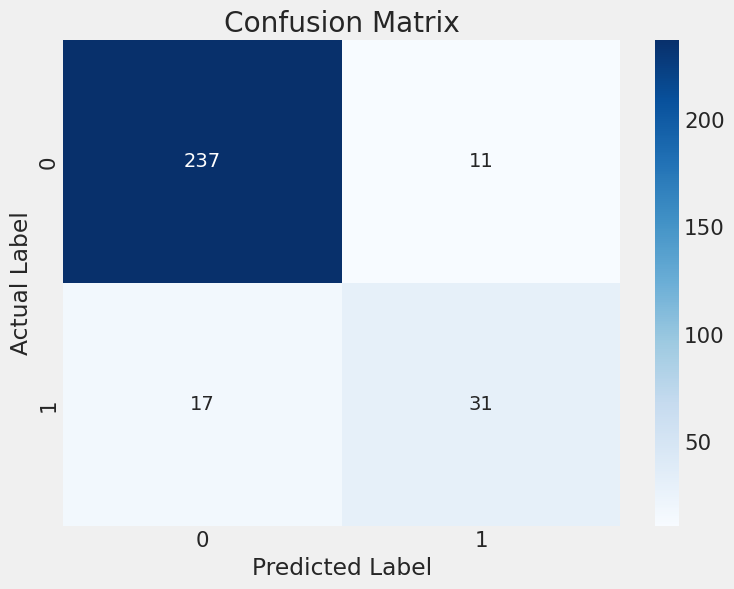

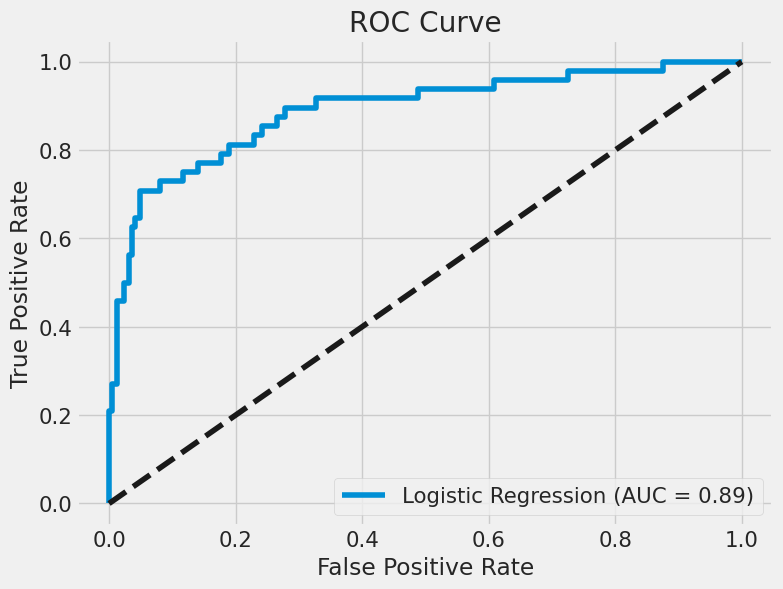

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# 1. Load the dataset
df = pd.read_csv('IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

# 2. Data Preprocessing
# Drop unnecessary columns and handle missing values
df_clean = df.drop(['EmpID'], axis=1)
df_clean['YearsWithCurrManager'] = df_clean['YearsWithCurrManager'].fillna(df_clean['YearsWithCurrManager'].median())

# Label encode the target variable 'Attrition' (Yes=1, No=0)
le = LabelEncoder()
df_clean['Attrition'] = le.fit_transform(df_clean['Attrition'])

# One-Hot Encoding for categorical features
df_final = pd.get_dummies(df_clean, drop_first=True)

# 3. Split data into Features (X) and Target (y)
X = df_final.drop('Attrition', axis=1)
y = df_final['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Training (Logistic Regression)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 6. Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# 7. Model Evaluation
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Visualization - Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')

# 9. Visualization - ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')

Accuracy Score: 0.8311

Confusion Matrix:
 [[238  10]
 [ 40   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90       248
           1       0.44      0.17      0.24        48

    accuracy                           0.83       296
   macro avg       0.65      0.56      0.57       296
weighted avg       0.79      0.83      0.80       296


ROC-AUC Score: 0.7095


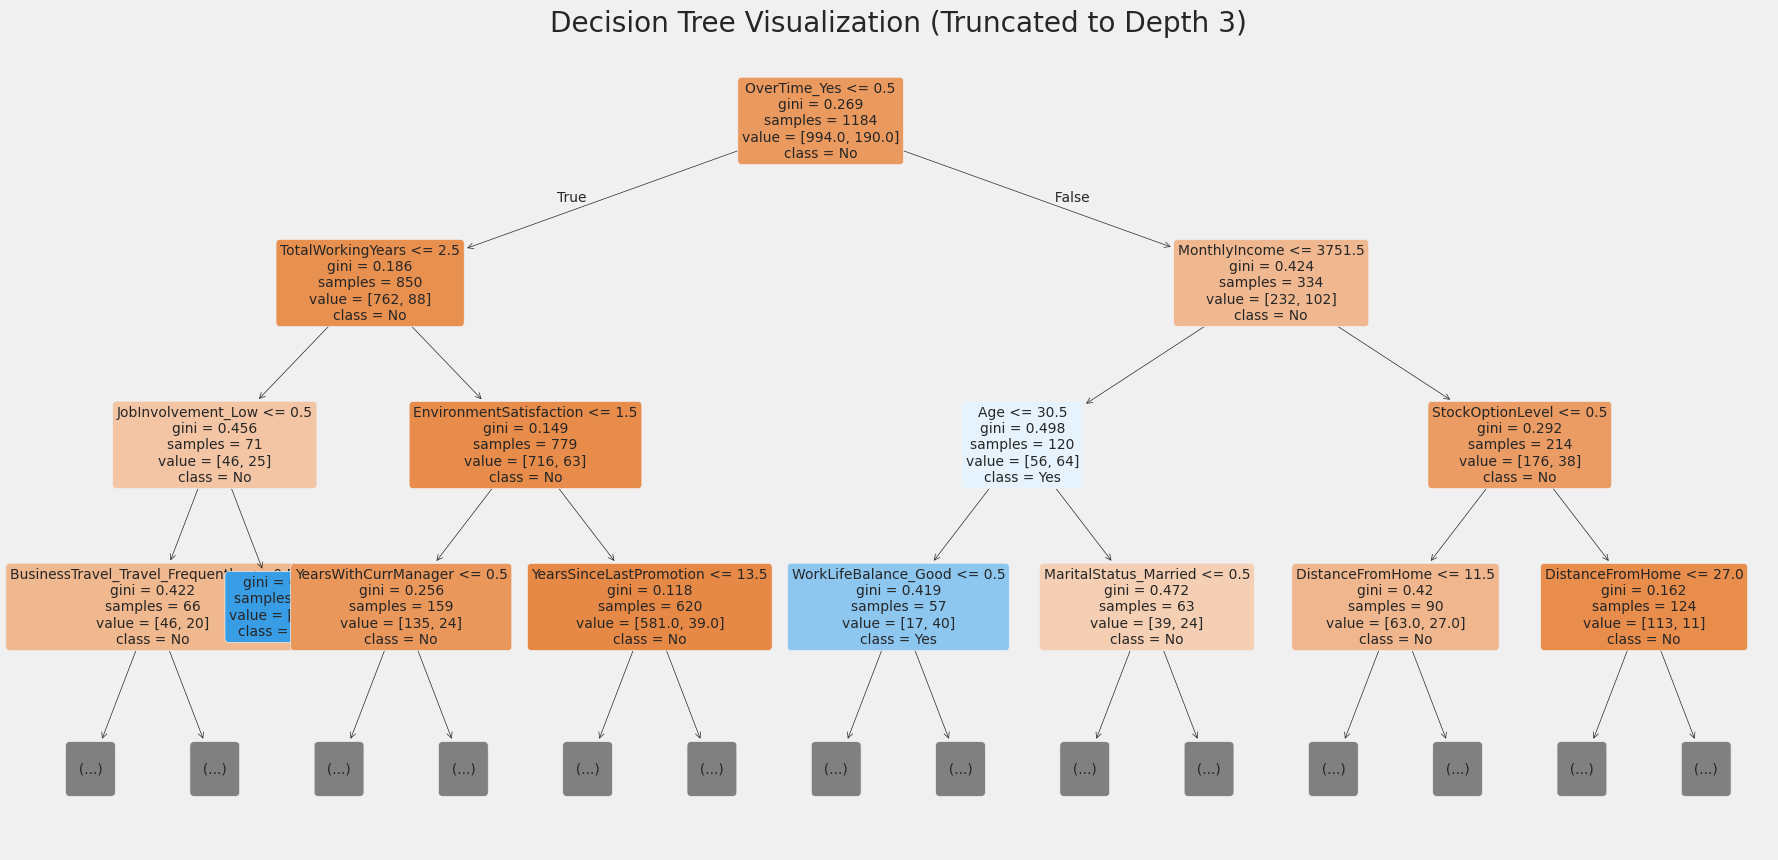

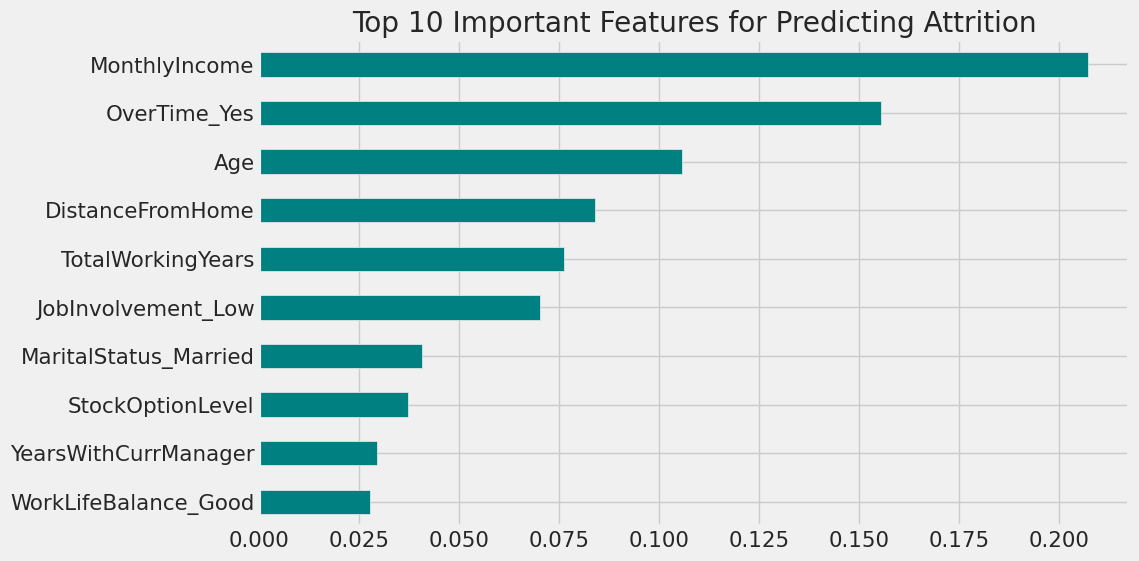

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# 1. Load the dataset
df = pd.read_csv('IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

# 2. Preprocessing
df_clean = df.drop(['EmpID'], axis=1)
df_clean['YearsWithCurrManager'] = df_clean['YearsWithCurrManager'].fillna(df_clean['YearsWithCurrManager'].median())

# Label encode target (Yes=1, No=0)
le = LabelEncoder()
df_clean['Attrition'] = le.fit_transform(df_clean['Attrition'])

# One-hot encoding for categorical variables
df_final = pd.get_dummies(df_clean, drop_first=True)

# 3. Split data
X = df_final.drop('Attrition', axis=1)
y = df_final['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Train Decision Tree Model
# max_depth=5 is used to keep the tree interpretable and avoid overfitting
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

# 5. Predictions
y_pred = dt_clf.predict(X_test)
y_prob = dt_clf.predict_proba(X_test)[:, 1]

# 6. Output Metrics
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# 7. Visualization - Decision Tree Structure
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'],
          filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title('Decision Tree Visualization (Truncated to Depth 3)')
plt.savefig('decision_tree_viz.png')

# 8. Visualization - Feature Importance
importances = pd.Series(dt_clf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', color='teal')
plt.title('Top 10 Important Features for Predicting Attrition')
plt.gca().invert_yaxis()
plt.savefig('dt_feature_importance.png')

**Summary:**

Q&A

Among 'Research & Development' and 'Human Resources', the department with the highest attrition rate is 'Human Resources' at 19.05%.

**Data Analysis Key Findings**

The attrition rate for the 'Human Resources' department is 19.05%.

The attrition rate for the 'Research & Development' department is 13.75%.

'Human Resources' exhibits a higher attrition rate (19.05%) compared to 'Research & Development' (13.75%).

**Insights or Next Steps**

Further investigation is recommended to understand the underlying causes of the higher attrition rate in the 'Human Resources' department.

Consider conducting an in-depth analysis of factors such as workload, compensation, career development opportunities, and employee satisfaction specific to the 'Human Resources' department to inform targeted retention strategies.